In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def week_number(date):
    '''
        date is a string given in the following format: 14-08-22
        it parses the date and returns an integer depending on which week it is.
        April 24-30 is week zero'''
    #16 Jan 2-8
    
    date = date.split("-")
    day_number = 0
    for i in range(len(date)):
        if i == 0: # Day
            day_number += int(date[i])
        elif i==2: # Year
            if int(date[i]) == 22: #Needs to add 52 weeks
                return 17+52-round((day_number+1)/7) #The +1 is because of rounding
            else: #Needs to subtract
                return 17-round((day_number+2)/7) #The +2 is because of rounding
        else: # Month
            # Needs to add all the previous months
            day_number += month_days(int(date[i]))
            
def month_days(month):
    '''month is an integer value
        returns the number of days until that month
    '''
    days = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
    return days[month-1]

In [3]:
data = pd.read_csv('recordings.txt')
print(data)

       Date    Km  Time(min)  Speed(km/h)
0  16-07-22  16.1         51         18.7
1  02-08-22  10.6         34         18.4
2  06-08-22  18.5         58         19.0
3  12-08-22   5.7         18         18.9
4  13-08-22   8.2         31         15.4
5  14-08-22  35.6        108         19.7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         6 non-null      object 
 1   Km           6 non-null      float64
 2   Time(min)    6 non-null      int64  
 3   Speed(km/h)  6 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 320.0+ bytes


In [5]:
data["Km"][5]

35.6

In [6]:
activity_weeks = []

for i in range(len(data)):
    
    current_week = week_number(data["Date"][i]) 
    print(current_week)
    try:
        if current_week != activity_weeks[-1]:
            activity_weeks.append(current_week)
            
    except IndexError as e:
        activity_weeks.append(current_week)
        
print(activity_weeks)
        
    # print(data["Date"][i])
    # print(week_number(data["Date"][i]))

    # if data["Date"][i] == '14-08-22':
    #     print(i)
    #     print(data["Km"][i])

41
38
38
37
37
37
[41, 38, 37]


In [19]:
# Obtain the total amount of km ridden in a given week
def stats(week, data):
    banner = True
    total_km = 0
    total_time = 0
    avg_speed = []
    
    for i in range(len(data)):
        
        current_week = week_number(data["Date"][i])
        
        if week == current_week:
            total_km += data["Km"][i]
            total_time += data["Time(min)"][i]
            avg_speed.append(data["Speed(km/h)"][i])
            banner = False
        
        elif week != current_week and banner == False:
            break
            
    return total_km, total_time, np.sum(avg_speed)/len(avg_speed)

In [20]:
print(data)

       Date    Km  Time(min)  Speed(km/h)
0  16-07-22  16.1         51         18.7
1  02-08-22  10.6         34         18.4
2  06-08-22  18.5         58         19.0
3  12-08-22   5.7         18         18.9
4  13-08-22   8.2         31         15.4
5  14-08-22  35.6        108         19.7


In [30]:
def print_stats(week, data):
    total_km, total_time, avg_speed = stats(week, data)
    
    print("Stats for week " + str(week))
    print("Distance: " + str(total_km) + " km")
    print("Time: " + str(total_time) + " min")
    print("Average speed: " + str(avg_speed) + " km/h")
    
    return None

In [33]:
for week in activity_weeks:
    print_stats(week, data)
    print("\n")

Stats for week 41
Distance: 16.1 km
Time: 51 min
Average speed: 18.7 km/h


Stats for week 38
Distance: 29.1 km
Time: 92 min
Average speed: 18.7 km/h


Stats for week 37
Distance: 49.5 km
Time: 157 min
Average speed: 18.0 km/h




In [42]:
length = len(activity_weeks)

distance = np.zeros(length)
time = np.zeros(length)
speed = np.zeros(length)

i = 0

for week in activity_weeks:
    total_km, total_time, avg_speed = stats(week, data)
    distance[i], time[i], speed[i] = total_km, total_time, avg_speed
    i += 1

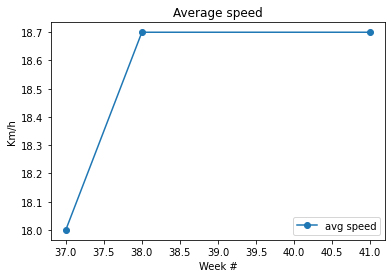

In [56]:
plt.plot(activity_weeks, speed, marker="o", label = "avg speed")
# plt.ylim([0,52])
plt.xlabel("Week #")
plt.ylabel("Km/h")
plt.title("Average speed")
plt.legend()
plt.show()

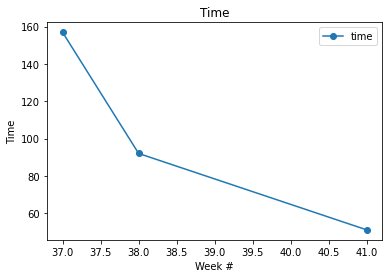

In [ ]:
plt.plot(activity_weeks, time, marker="o", label = "time")
# plt.ylim([0,52])
plt.xlabel("Week #")
plt.ylabel("Time")
plt.title("Time")
plt.legend()
plt.show()

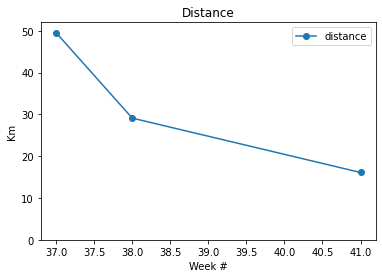

In [52]:
plt.plot(activity_weeks, distance, marker="o", label = "distance")
plt.ylim([0,52])
plt.xlabel("Week #")
plt.ylabel("Km")
plt.title("Distance")
plt.legend()
plt.show()